In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use("ggplot")
%matplotlib inline


df = pd.read_csv("/Users/abdulmajeedalroumi/Desktop/Network Behavior anomaly Detection/kddcup_corrected_subset.csv")

In [3]:
df.head()

,duration,"""protocol_type""","""flag""","""src_bytes""","""dst_bytes""","""land""","""wrong_fragment""","""urgent""",hot,"""num_failed_logins""",...,"""dst_host_srv_count""","""dst_host_same_srv_rate""","""dst_host_diff_srv_rate""","""dst_host_same_src_port_rate""","""dst_host_srv_diff_host_rate""",dst_host_serror_rate,"""dst_host_srv_serror_rate""","""dst_host_rerror_rate""","""dst_host_srv_rerror_rate""",label
0,0,tcp,SF,223,185,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
1,0,tcp,SF,230,260,0,0,0,0,0,...,255,1,0,33,7,33,0,0,0,normal
2,0,tcp,SF,297,13787,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
3,0,tcp,SF,291,3542,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
4,0,tcp,SF,295,753,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal


In [4]:
df.shape

(41237, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41237 entries, 0 to 41236
Data columns (total 41 columns):
duration                          41237 non-null int64
 "protocol_type"                  41237 non-null object
 "flag"                           41237 non-null object
 "src_bytes"                      41237 non-null int64
 "dst_bytes"                      41237 non-null int64
 "land"                           41237 non-null int64
 "wrong_fragment"                 41237 non-null int64
 "urgent"                         41237 non-null int64
hot                               41237 non-null int64
 "num_failed_logins"              41237 non-null int64
 "logged_in"                      41237 non-null int64
 "num_compromised"                41237 non-null int64
 "root_shell"                     41237 non-null int64
 "su_attempted"                   41237 non-null int64
 "num_root"                       41237 non-null int64
 "num_file_creations"             41237 non-null int64
 "num_she

In [6]:
target = df["label"][:].values
from collections import Counter
Counter(target)

Counter({'normal': 39247,
         'apache2': 794,
         'phf': 2,
         'back': 1098,
         'neptune': 93,
         'portsweep': 2,
         'saint': 1})

In [7]:
str((39247/len(target))*100)+"%"

'95.174236729151%'

In [8]:
from sklearn.preprocessing import LabelEncoder
encodings = dict()
for c in df.columns:
    if df[c].dtype == "object":
        encodings[c] = LabelEncoder()
        df[c] = encodings[c].fit_transform(df[c])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41237 entries, 0 to 41236
Data columns (total 41 columns):
duration                          41237 non-null int64
 "protocol_type"                  41237 non-null int64
 "flag"                           41237 non-null int64
 "src_bytes"                      41237 non-null int64
 "dst_bytes"                      41237 non-null int64
 "land"                           41237 non-null int64
 "wrong_fragment"                 41237 non-null int64
 "urgent"                         41237 non-null int64
hot                               41237 non-null int64
 "num_failed_logins"              41237 non-null int64
 "logged_in"                      41237 non-null int64
 "num_compromised"                41237 non-null int64
 "root_shell"                     41237 non-null int64
 "su_attempted"                   41237 non-null int64
 "num_root"                       41237 non-null int64
 "num_file_creations"             41237 non-null int64
 "num_shell

In [10]:
y = df.pop("label").values
X = df.values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(24741, 40)
(24741,)
(8248, 40)
(8248,)
(8248, 40)
(8248,)


total length =  8248
Anomolies =  224
Normal =  8024


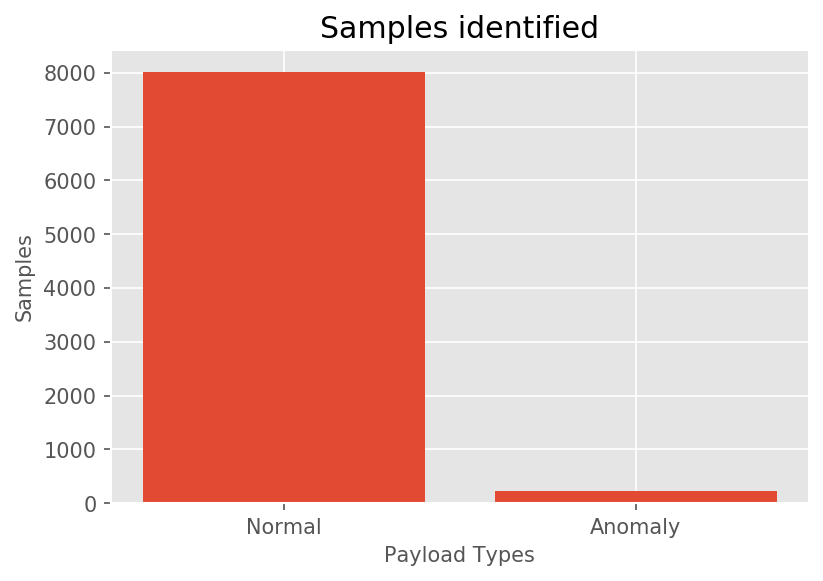

In [70]:
checking_occurences = [X for X in y_test if X == 1]
print("total length = ",len(y_test))
print("Anomolies = ",len(checking_occurences))
print("Normal = ", (len(y_test) - len(checking_occurences)))
n = len(y_test) - len(checking_occurences)
a = len(checking_occurences)

label = ['Normal', 'Anomaly']
samples = [n, a]

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi * 1.5

# this is for plotting purpose
index = np.arange(len(label))
plt.bar(index, samples)
plt.xlabel('Payload Types', fontsize=10)
plt.ylabel('Samples', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=0)
plt.title('Samples identified')
plt.show()

In [13]:
# to_model_columns=df.columns[1:41]
from sklearn.ensemble import IsolationForest
iForest = IsolationForest()
# iForest.fit(df[to_model_columns])
# pred = iForest.predict(df[to_model_columns])
# df['anomaly']=pred
# outliers=df.loc[df['anomaly']==-1]
# outlier_index=list(outliers.index)
# #print(outlier_index)
# #Find the number of anomalies and normal points here points classified -1 are anomalous
# print(df['anomaly'].value_counts())

In [14]:
iForest.fit(X_train)

/Users/abdulmajeedalroumi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/abdulmajeedalroumi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [15]:
scores = iForest.decision_function(X_val)

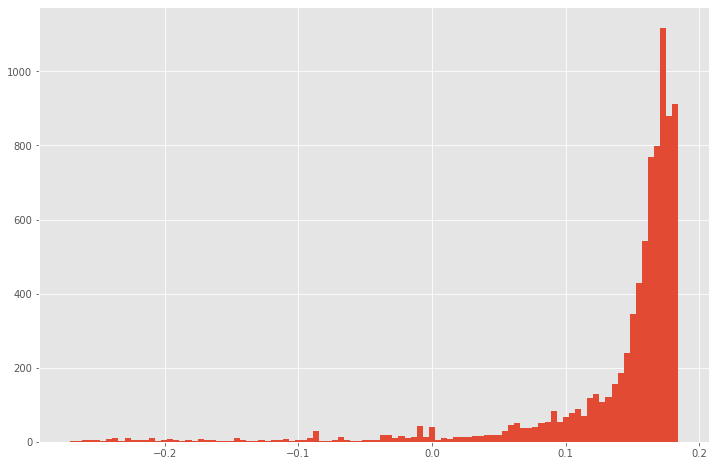

In [16]:
plt.figure(figsize=(12,8))
plt.hist(scores, bins=100);

In [30]:
cutoff = -0.07

In [32]:
Counter(y_val)

Counter({3: 7871, 1: 199, 0: 165, 2: 13})

In [37]:
Counter(y_val[cutoff>scores])

Counter({0: 160, 1: 21, 2: 13, 3: 8})

In [39]:
from sklearn.metrics import roc_auc_score

In [49]:
train_roc_auc_score = roc_auc_score((cutoff < scores), y_val == list(encodings["label"].classes_).index("normal"))
print(str(train_roc_auc_score*100)+"%")

96.88259094365812%


In [44]:
score_test = iForest.decision_function(X_test)

In [45]:
Counter(y_test)

Counter({3: 7847, 0: 152, 1: 224, 6: 1, 2: 22, 5: 1, 4: 1})